In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
print(df['Department Name'].value_counts())
df['Class Name'].value_counts()

Department Name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64


Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [15]:
num_tops_knits = df[(df['Department Name'] == 'Bottoms') & (df['Class Name'] == 'Pants')].shape[0]
print(f"Number of Tops with Knits: {num_tops_knits}")

Number of Tops with Knits: 1388


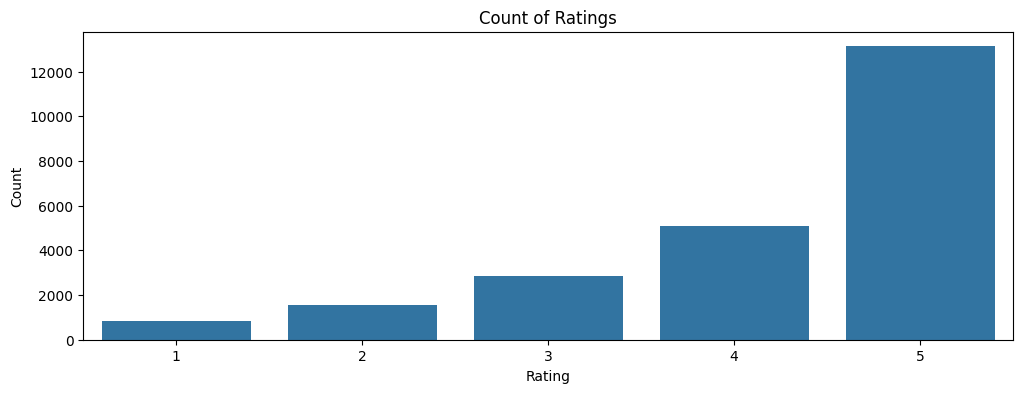

In [ ]:
# Rating Distribution Plot
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Rating', data=df)
ax.set_title('Count of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.show()

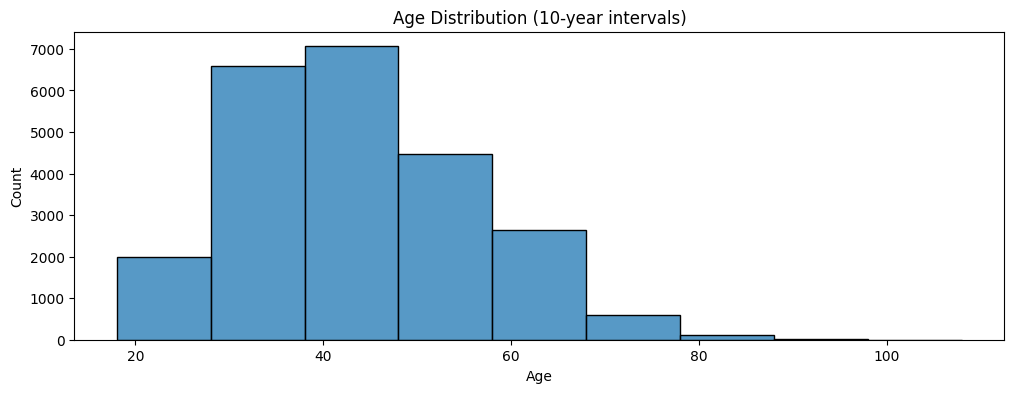

In [ ]:
plt.figure(figsize=(12,4))
bins = range(df['Age'].min(), df['Age'].max() + 10, 10)
ax = sns.histplot(df['Age'], bins=bins, kde=False)
ax.set_title('Age Distribution (10-year intervals)')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

In [ ]:
print(df['Division Name'].value_counts())
print(df['Department Name'].value_counts())
print(df['Class Name'].value_counts())

Division Name
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64
Department Name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64
Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64


In [ ]:
df_new = df.drop(columns=['Recommended IND', 'Positive Feedback Count', 'Division Name', 'Unnamed: 0'])

# drop rows with missing Review Text and reset indices
df_new = df_new.dropna(subset=['Review Text', 'Department Name', 'Class Name']).reset_index(drop=True)

In [ ]:
df_new.head()

,Clothing ID,Age,Title,Review Text,Rating,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses


In [ ]:
df_new.isnull().sum()

Clothing ID           0
Age                   0
Title              2966
Review Text           0
Rating                0
Department Name       0
Class Name            0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Clothing ID      22628 non-null  int64 
 1   Age              22628 non-null  int64 
 2   Title            19662 non-null  object
 3   Review Text      22628 non-null  object
 4   Rating           22628 non-null  int64 
 5   Department Name  22628 non-null  object
 6   Class Name       22628 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.2+ MB


In [ ]:
# Analyze text columns for NLP
print(f"Average review length: {df_new['Review Text'].str.len().mean():.1f} characters")
print(f"Average words per review: {df_new['Review Text'].str.split().str.len().mean():.1f} words")

Average review length: 308.8 characters
Average words per review: 60.2 words


# NLP Analysis

In [3]:
import nltk
import spacy
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [4]:
# # NLP Pacakages

%pip install --quiet nltk spacy scikit-learn gensim wordcloud transformers sentencepiece tqdm

# Download common NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Download spaCy small English model
spacy.cli.download("en_core_web_sm")

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Text preprocessing function
def clean_text(text):
    """Clean and preprocess text for NLP analysis"""
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply text cleaning
df_new['Clean_Title'] = df_new['Review Text'].apply(clean_text)
df_new['Clean_Review Text'] = df_new['Review Text'].apply(clean_text)

In [ ]:
df_new

,Clothing ID,Age,Title,Review Text,Rating,Department Name,Class Name,Clean_Title,Clean_Review Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates,absolutely wonderful silky and sexy and comfor...,absolutely wonderful silky and sexy and comfor...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses,love this dress its sooo pretty i happened to ...,love this dress its sooo pretty i happened to ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...
...,...,...,...,...,...,...,...,...,...
22623,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,Dresses,Dresses,i was very happy to snag this dress at such a ...,i was very happy to snag this dress at such a ...
22624,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,Tops,Knits,it reminds me of maternity clothes soft stretc...,it reminds me of maternity clothes soft stretc...
22625,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,Dresses,Dresses,this fit well but the top was very see through...,this fit well but the top was very see through...
22626,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,Dresses,Dresses,i bought this dress for a wedding i have this ...,i bought this dress for a wedding i have this ...


In [ ]:
df_new.to_csv('clean_csv.csv', index=False)

In [5]:
df_clean = pd.read_csv('clean_csv.csv')

## 1. Sentiment Analysis

In [4]:
# Rating Sentiment Categorization
def rating_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df_clean['Rating_Sentiment'] = df_clean['Rating'].apply(rating_sentiment)

In [8]:
# VADER Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon
nltk.download('vader_lexicon')

vader_analyzer = SentimentIntensityAnalyzer()

df_clean['VADER_Compound'] = df_clean['Clean_Review Text'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

def vader_sentiment(compound):
    if compound >= 0.2:
        return 'positive'
    elif compound <= -0.2:
        return 'negative'
    else:
        return 'neutral'

df_clean['VADER_Sentiment'] = df_clean['VADER_Compound'].apply(vader_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
# TextBlob sentiment Analysis
df_clean['TextBlob_Polarity'] = df_clean['Clean_Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

def textblob_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df_clean['TextBlob_Sentiment'] = df_clean['TextBlob_Polarity'].apply(textblob_sentiment)

In [10]:
# roBerta Sentiment Analysis
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
import torch
import torch.nn as nn
import torch.optim as optim

C:\Users\aksha\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)

def roberta_sentiment_analyzer(text, model):

    encoded_input = tokenizer(text, return_tensors="pt")
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = np.round(softmax(scores), 2)
    scores_dict = {"neg": scores[0], "neu": scores[1], "pos": scores[2]}
    return scores_dict

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
%%time
df_clean["probabilities"] = df_clean["Clean_Review Text"].apply(
    roberta_sentiment_analyzer, model=roberta_model
)

KeyboardInterrupt: 

In [13]:
polarity_weights = torch.tensor([-1, 0, 1], dtype=torch.float32)

# Extract the 'neg', 'neu', and 'pos' values from the 'probabilities' column
probs = torch.tensor(df_clean['probabilities'].apply(lambda x: [x['neg'], x['neu'], x['pos']]).tolist(), dtype=torch.float32)

polarity = probs @ polarity_weights
polarity_scaled = torch.tanh(polarity)

df_clean["roberta_polarity"] = polarity_scaled.detach().numpy()
df_clean["roberta_sentiment"] = pd.cut(
    df_clean["roberta_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)

KeyError: 'probabilities'

In [23]:
df_clean[['Rating', 'Rating_Sentiment', 'VADER_Sentiment', 'TextBlob_Sentiment', 'roberta_sentiment']].head(10)

,Rating,Rating_Sentiment,VADER_Sentiment,TextBlob_Sentiment,roberta_sentiment
0,4,positive,positive,positive,Positive
1,5,positive,positive,positive,Positive
2,3,neutral,positive,neutral,Positive
3,5,positive,positive,positive,Positive
4,5,positive,positive,positive,Positive
5,2,negative,positive,positive,Negative
6,5,positive,positive,neutral,Positive
7,4,positive,neutral,positive,Positive
8,5,positive,positive,neutral,Positive
9,5,positive,negative,positive,Positive


In [24]:
df_clean['Clean_Review Text'].head(10)

,Clean_Review Text
0,absolutely wonderful silky and sexy and comfor...
1,love this dress its sooo pretty i happened to ...
2,i had such high hopes for this dress and reall...
3,i love love love this jumpsuit its fun flirty ...
4,this shirt is very flattering to all due to th...
5,i love tracy reese dresses but this one is not...
6,i aded this in my basket at hte last mintue to...
7,i ordered this in carbon for store pick up and...
8,i love this dress i usually get an xs but it r...
9,im and lbs i ordered the s petite to make sure...


In [25]:
print(df_clean['Rating_Sentiment'].value_counts())
print(df_clean['VADER_Sentiment'].value_counts())
print(df_clean['TextBlob_Sentiment'].value_counts())
print(df_clean['roberta_sentiment'].value_counts())

Rating_Sentiment
positive    17435
neutral      2823
negative     2370
Name: count, dtype: int64
VADER_Sentiment
positive    20522
negative     1097
neutral      1009
Name: count, dtype: int64
TextBlob_Sentiment
positive    18534
neutral      3676
negative      418
Name: count, dtype: int64
roberta_sentiment
Positive    17470
Negative     3488
Neutral      1670
Name: count, dtype: int64


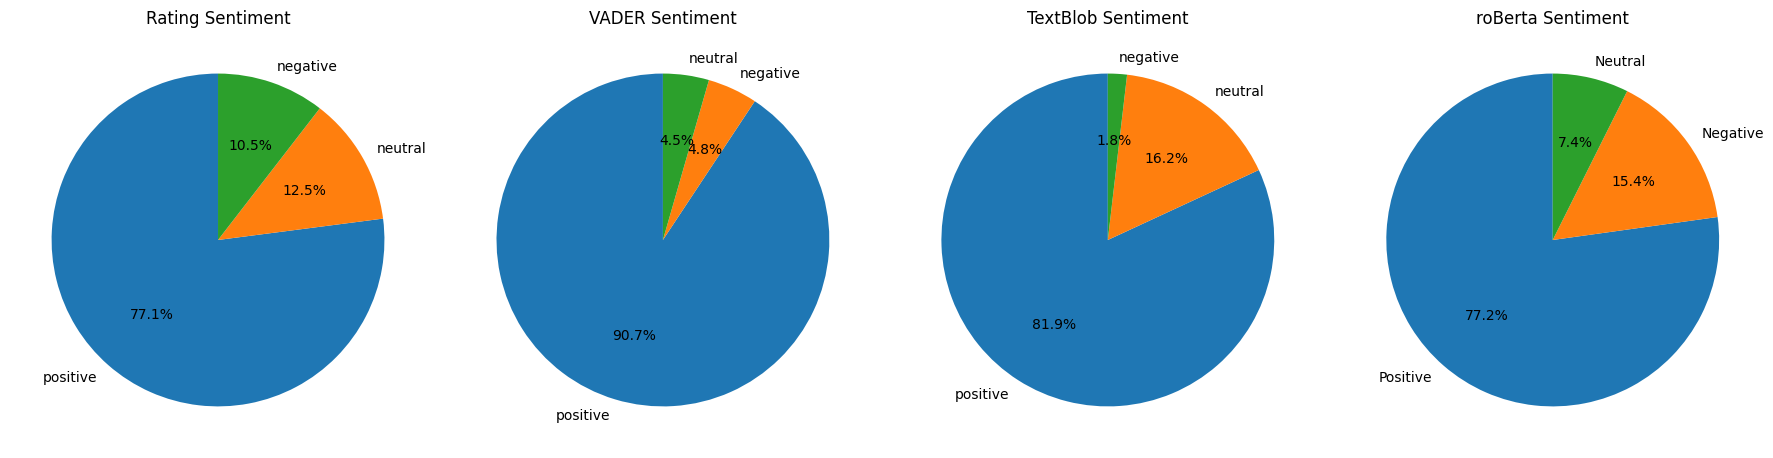

In [27]:
# Comprasion between Sentiment Analysis Methods
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Rating_Sentiment
df_clean['Rating_Sentiment'].value_counts(normalize=True).plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Rating Sentiment')
axes[0].set_ylabel('')

# VADER_Sentiment
df_clean['VADER_Sentiment'].value_counts(normalize=True).plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('VADER Sentiment')
axes[1].set_ylabel('')

# TextBlob_Sentiment
df_clean['TextBlob_Sentiment'].value_counts(normalize=True).plot.pie(ax=axes[2], autopct='%1.1f%%', startangle=90)
axes[2].set_title('TextBlob Sentiment')
axes[2].set_ylabel('')

# roBertra_Sentiment
df_clean['roberta_sentiment'].value_counts(normalize=True).plot.pie(ax=axes[3], autopct='%1.1f%%', startangle=90)
axes[3].set_title('roBerta Sentiment')
axes[3].set_ylabel('')

plt.tight_layout()
plt.show()

Accuracy of VADER and TextBlob Sentiment

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print("TextBlob Classification Report")
print(classification_report(df_clean['Rating_Sentiment'], df_clean['TextBlob_Sentiment']))

print("VADER Classification Report")
print(classification_report(df_clean['Rating_Sentiment'], df_clean['VADER_Sentiment']))

print("roBerta Classification Report")
print(classification_report(df_clean['Rating_Sentiment'], df_clean['roberta_sentiment'].str.lower()))

TextBlob Classification Report
              precision    recall  f1-score   support

    negative       0.52      0.09      0.16      2370
     neutral       0.22      0.28      0.24      2823
    positive       0.83      0.88      0.86     17435

    accuracy                           0.72     22628
   macro avg       0.52      0.42      0.42     22628
weighted avg       0.72      0.72      0.71     22628

VADER Classification Report
              precision    recall  f1-score   support

    negative       0.46      0.21      0.29      2370
     neutral       0.28      0.10      0.15      2823
    positive       0.82      0.96      0.88     17435

    accuracy                           0.77     22628
   macro avg       0.52      0.42      0.44     22628
weighted avg       0.71      0.77      0.73     22628

roBerta Classification Report
              precision    recall  f1-score   support

    negative       0.45      0.66      0.53      2370
     neutral       0.30      0.17      0

In [14]:
df_clean['models_agree'].value_counts()

KeyError: 'models_agree'

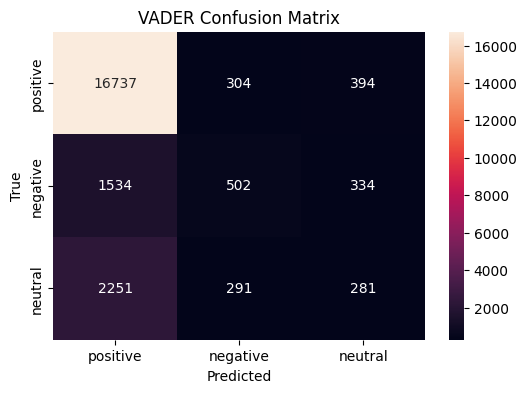

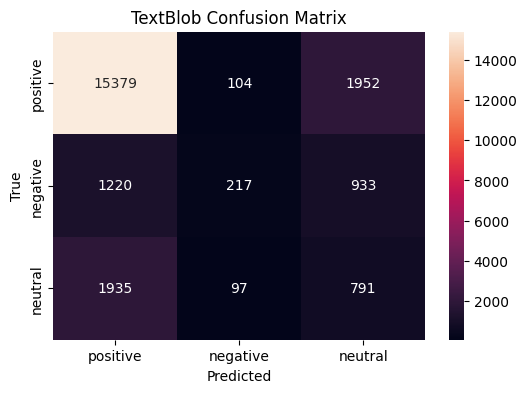

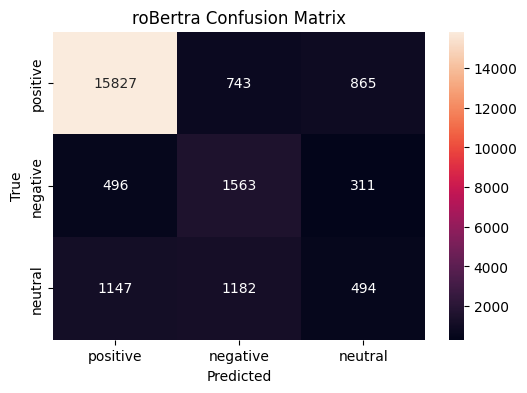

In [46]:
plt.figure(figsize=(6, 4))
cm_vader = confusion_matrix(df_clean['Rating_Sentiment'], df_clean['VADER_Sentiment'], labels=['positive', 'negative', 'neutral'])
sns.heatmap(cm_vader, annot=True, fmt='d', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title("VADER Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(6, 4))
cm_blob = confusion_matrix(df_clean['Rating_Sentiment'], df_clean['TextBlob_Sentiment'], labels=['positive', 'negative', 'neutral'])
sns.heatmap(cm_blob, annot=True, fmt='d', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title("TextBlob Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

plt.figure(figsize=(6, 4))
cm_roberta = confusion_matrix(df_clean['Rating_Sentiment'], df_clean['roberta_sentiment'].str.lower(), labels=['positive', 'negative', 'neutral'])
sns.heatmap(cm_roberta, annot=True, fmt='d', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title("roBertra Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 2. Topic Analysis and Theme Identification

In [53]:
from wordcloud import WordCloud
from gensim import corpora, models
from collections import Counter


# Word Frequency Analysis

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
df_clean['tokens_Word Frequency'] = df_clean['Clean_Review Text'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# Flatten list of tokens for all reviews
all_tokens = [token for tokens in df_clean['tokens_Word Frequency'] for token in tokens]
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)
print("20 most common words:", common_words)

20 most common words: [('dress', 10461), ('love', 8910), ('size', 8691), ('top', 7323), ('fit', 7238), ('like', 6991), ('wear', 6409), ('great', 6073), ('im', 5987), ('would', 5009), ('fabric', 4754), ('color', 4556), ('small', 4546), ('look', 4014), ('really', 3921), ('ordered', 3831), ('little', 3769), ('perfect', 3729), ('one', 3576), ('flattering', 3484)]


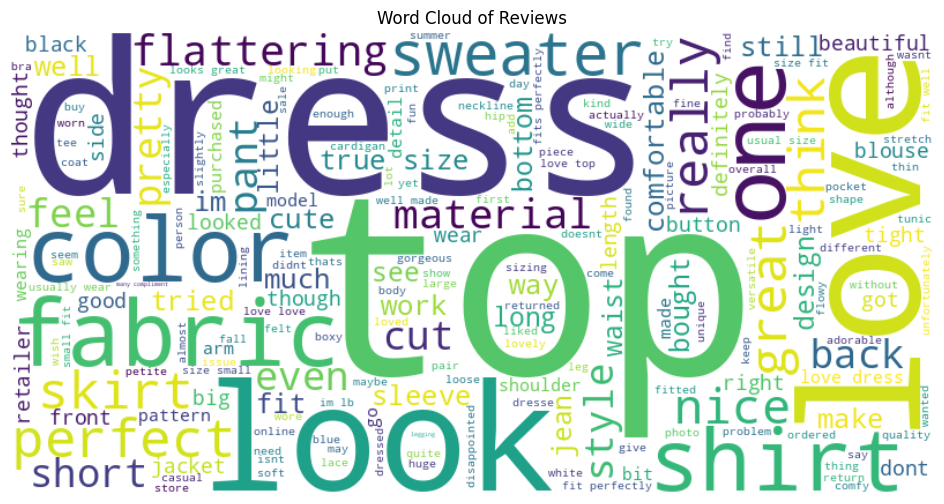

In [54]:
# Sample text
text = ' '.join(all_tokens)

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [55]:
# LDA Topic Modeling
# Prepare data for LDA
dictionary = corpora.Dictionary(df_clean['tokens_Word Frequency'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_clean['tokens_Word Frequency']]

# Fit LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)

# Display topics
for idx, topic in lda_model.print_topics(num_words=8):
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.025*"like" + 0.014*"top" + 0.013*"would" + 0.012*"back" + 0.012*"look" + 0.012*"fabric" + 0.012*"really" + 0.011*"looks"
Topic 2: 0.030*"love" + 0.024*"great" + 0.018*"wear" + 0.014*"jeans" + 0.013*"comfortable" + 0.013*"perfect" + 0.012*"soft" + 0.010*"color"
Topic 3: 0.078*"dress" + 0.012*"fabric" + 0.012*"im" + 0.011*"waist" + 0.011*"skirt" + 0.011*"like" + 0.011*"fit" + 0.010*"would"
Topic 4: 0.031*"top" + 0.029*"size" + 0.025*"small" + 0.018*"im" + 0.017*"large" + 0.015*"wear" + 0.015*"fit" + 0.013*"little"
Topic 5: 0.046*"size" + 0.023*"petite" + 0.021*"store" + 0.021*"ordered" + 0.018*"fit" + 0.015*"tried" + 0.015*"xs" + 0.013*"small"


In [56]:
df_clean.head()

,Clothing ID,Age,Title,Review Text,Rating,Department Name,Class Name,Clean_Title,Clean_Review Text,probabilities,roberta_polarity,roberta_sentiment,Rating_Sentiment,VADER_Compound,VADER_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,models_agree,tokens_Word Frequency
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimate,Intimates,absolutely wonderful silky and sexy and comfor...,absolutely wonderful silky and sexy and comfor...,"{'neg': 0.01, 'neu': 0.02, 'pos': 0.98}",0.748704,Positive,positive,0.8932,positive,0.633333,positive,True,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,Dresses,love this dress its sooo pretty i happened to ...,love this dress its sooo pretty i happened to ...,"{'neg': 0.01, 'neu': 0.02, 'pos': 0.98}",0.748704,Positive,positive,0.9719,positive,0.318750,positive,True,"[love, dress, sooo, pretty, happened, find, st..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,Dresses,i had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...,"{'neg': 0.09, 'neu': 0.19, 'pos': 0.72}",0.558052,Positive,neutral,0.9398,positive,0.076392,neutral,False,"[high, hopes, dress, really, wanted, work, ini..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Bottoms,Pants,i love love love this jumpsuit its fun flirty ...,i love love love this jumpsuit its fun flirty ...,"{'neg': 0.0, 'neu': 0.01, 'pos': 0.99}",0.757362,Positive,positive,0.4805,positive,0.500000,positive,True,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,Tops,Blouses,this shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...,"{'neg': 0.0, 'neu': 0.01, 'pos': 0.99}",0.757362,Positive,positive,0.9162,positive,0.393750,positive,True,"[shirt, flattering, due, adjustable, front, ti..."


## 3. Emotion Detection

In [ ]:
# Pretrained transformer model for emotion detection
from transformers import pipeline
classifier = pipeline("text-classification",model="nateraw/bert-base-uncased-emotion")


C:\Users\aksha\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aksha\.cache\huggingface\hub\models--nateraw--bert-base-uncased-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [60]:
import torch
from tqdm import tqdm

texts = df_clean['Clean_Review Text'].astype(str).tolist()

# predict in batches to avoid OOM and speed up
batch_size = 32
emo_labels = []
emo_scores = []

for i in tqdm(range(0, len(texts), batch_size), desc="HF emotion inference"):
    batch = texts[i:i + batch_size]
    # ensure non-empty strings (model handles short inputs better than empty strings)
    batch = [t if t.strip() else " " for t in batch]
    preds = classifier(batch, truncation=True)
    for p in preds:
        emo_labels.append(p['label'])
        emo_scores.append(p['score'])

# attach results to dataset
df_clean['Emotion_HF'] = emo_labels
df_clean['Emotion_HF_Score'] = emo_scores

HF emotion inference: 100%|██████████| 708/708 [03:19<00:00,  3.54it/s]


In [61]:
df_clean[['Clean_Review Text', 'Emotion_HF', 'Emotion_HF_Score']].head()

,Clean_Review Text,Emotion_HF,Emotion_HF_Score
0,absolutely wonderful silky and sexy and comfor...,joy,0.995317
1,love this dress its sooo pretty i happened to ...,joy,0.985154
2,i had such high hopes for this dress and reall...,joy,0.894677
3,i love love love this jumpsuit its fun flirty ...,joy,0.988186
4,this shirt is very flattering to all due to th...,joy,0.922955


In [62]:
df_clean['Emotion_HF'].value_counts()

,count
Emotion_HF,
joy,17723
love,1847
sadness,1523
surprise,552
fear,496
anger,487


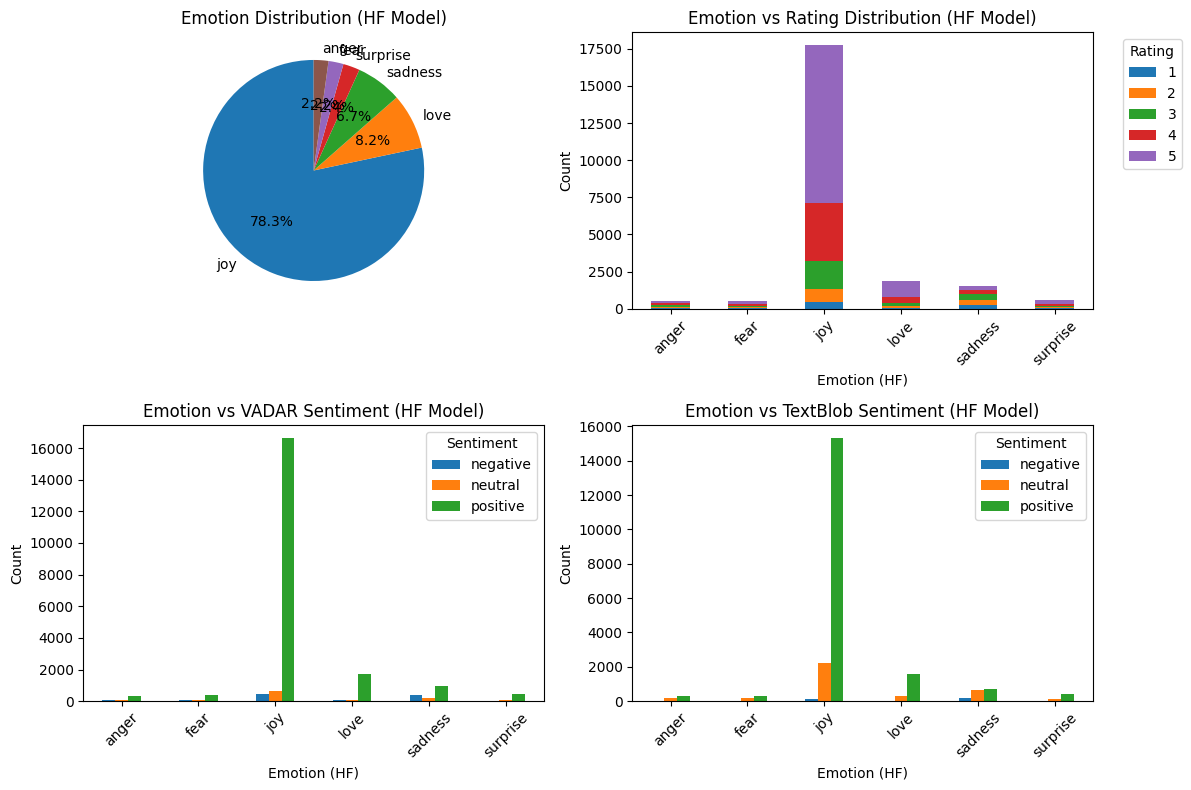

In [ ]:
# Visualize emotion distribution using columns from our dataset
plt.figure(figsize=(12, 8))

# Emotion distribution pie chart
plt.subplot(2, 2, 1)
emotion_counts = df_clean['Emotion_HF'].value_counts()
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution (HF Model)')

# Emotion vs Rating
plt.subplot(2, 2, 2)
emotion_rating = df_clean.groupby(['Emotion_HF', 'Rating']).size().unstack(fill_value=0)
emotion_rating.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Emotion vs Rating Distribution (HF Model)')
plt.xlabel('Emotion (HF)')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Emotion vs VADAR Sentiment
plt.subplot(2, 2, 3)
emotion_sentiment = pd.crosstab(df_clean['Emotion_HF'], df_clean['VADER_Sentiment'])
emotion_sentiment.plot(kind='bar', ax=plt.gca())
plt.title('Emotion vs VADAR Sentiment (HF Model)')
plt.xlabel('Emotion (HF)')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)

# Emotion vs TextBlob Sentiment
plt.subplot(2, 2, 4)
emotion_sentiment = pd.crosstab(df_clean['Emotion_HF'], df_clean['TextBlob_Sentiment'])
emotion_sentiment.plot(kind='bar', ax=plt.gca())
plt.title('Emotion vs TextBlob Sentiment (HF Model)')
plt.xlabel('Emotion (HF)')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)

# Emotion vs roBertra Sentiment
plt.subplot(2, 2, 5)
emotion_sentiment = pd.crosstab(df_clean['Emotion_HF'], df_clean['roberta_sentiment'])
emotion_sentiment.plot(kind='bar', ax=plt.gca())
plt.title('Emotion vs roBertra Sentiment (HF Model)')
plt.xlabel('Emotion (HF)')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

VADAR Sentiment is doing better job than TextBlob Sentiment, when we compare based on Emotions.

## 4. Intent Detection
Intent behind feedback of custmor like complaint, size issue, return, etc.

In [ ]:
# zero-shot + simple rule-based overrides

intent_labels = [
    "complaint",
    "praise",
    "feature_request",
    "size_issue",
    "quality_concern",
    "shipping_issue",
    "return_request",
    "pricing_issue",
    "other"
]

# Using Pre-trained model pipeline
intent_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

texts = df_clean['Clean_Review Text'].astype(str).tolist()

batch_size = 32
intent_preds = []
intent_scores = []

for i in tqdm(range(0, len(texts), batch_size), desc="Zero-shot intent inference"):
    batch = texts[i:i + batch_size]
    batch = [t if t.strip() else " " for t in batch]
    preds = intent_classifier(batch, candidate_labels=intent_labels, truncation=True)
    # preds is a list of dicts for a batch
    for p in preds:
        # p['labels'] is ordered by score (highest first)
        intent_preds.append(p['labels'][0])
        intent_scores.append(p['scores'][0])

# Attach initial zero-shot predictions
df_clean['Intent_ZS_Label'] = intent_preds
df_clean['Intent_ZS_Score'] = intent_scores

# Simple rule-based overrides to catch common intent keywords (improves precision for domain-specific intents)
override_rules = {
    'size_issue': ['too small', 'too large', 'too big', 'small', 'large', 'tight', 'loose', 'fit', 'fits', "size"],
    'return_request': ['return', 'refund', 'exchange', 'sent back'],
    'praise': ['love', 'amazing', 'great', 'perfect', 'recommend', 'excellent', 'awesome', 'fantastic'],
    'complaint': ['disappointed', 'not happy', 'terrible', 'awful', 'hate', 'worst', 'problem', 'issue', "didn't"],
    'quality_concern': ['quality', 'cheap', 'fell apart', 'tear', 'stain', 'broken', 'fraying', 'weak', 'poor'],
    'shipping_issue': ['shipping', 'arrive', 'delayed', 'delay', 'late', 'lost in transit'],
    'pricing_issue': ['price', 'expensive', 'overpriced', 'cost', 'cheap for the price']
}

def apply_overrides(text, current_label):
    if not isinstance(text, str):
        return current_label
    lt = text.lower()
    for label, phrases in override_rules.items():
        for ph in phrases:
            if ph in lt:
                return label
    return current_label

# Apply overrides and store final intent label
df_clean['Intent_Label'] = [
    apply_overrides(txt, zs_label) for txt, zs_label in zip(df_clean['Clean_Review Text'].astype(str), df_clean['Intent_ZS_Label'])
]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Zero-shot intent inference:  49%|████▉     | 347/708 [45:40<48:04,  7.99s/it]

In [ ]:
# Optional: mark whether override changed the prediction
df_clean['Intent_Overridden'] = df_clean['Intent_Label'] != df_clean['Intent_ZS_Label']

print(df_clean['Intent_Label'].value_counts())

In [ ]:
df_clean

## 5. Named Entity Recognition (NER)

Extract and categorize key entities from reviews: product types, colors, materials, brands, sizes, etc.

In [ ]:
# Simple rule-based NER for fashion reviews
entity_patterns = {
    'sizes': ['xs', 'small', 'medium', 'large', 'xl', 'xxl', 'petite', 'plus size', 'loose', 'tight'],
    'colors': ['black', 'white', 'red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'grey', 'navy', 'beige', 'cream', 'tan', 'burgundy', 'teal'],
    'materials': ['cotton', 'silk', 'wool', 'polyester', 'denim', 'leather', 'lace', 'chiffon', 'satin', 'velvet', 'cashmere', 'linen', 'rayon', 'spandex', 'lycra'],
    'clothing_types': ['dress', 'shirt', 'blouse', 'pants', 'jeans', 'skirt', 'jacket', 'coat', 'sweater', 'cardigan', 'top', 'tunic', 'blazer', 'vest'],
    'fit_descriptors': ['tight', 'loose', 'fitted', 'baggy', 'snug', 'comfortable', 'stretchy', 'rigid', 'form fitting', 'relaxed'],
    'style_descriptors': ['casual', 'formal', 'elegant', 'trendy', 'classic', 'modern', 'vintage', 'bohemian', 'chic', 'sporty']
}

def extract_entities(text):
    """Extract entities from text using pattern matching"""
    if pd.isna(text):
        return {}

    text = str(text).lower()
    extracted = {}

    for entity_type, patterns in entity_patterns.items():
        found_entities = [pattern for pattern in patterns if pattern in text]
        if found_entities:
            extracted[entity_type] = found_entities

    return extracted

# Apply entity extraction
df_clean['extracted_entities'] = df_clean['Review Text'].apply(extract_entities)

# Count entity occurrences
entity_stats = {}
for entity_type in entity_patterns.keys():
    entity_stats[entity_type] = sum(1 for entities in df_clean['extracted_entities'] if entity_type in entities)

print("Entity Extraction Results:")
for entity_type, count in entity_stats.items():
    print(f"{entity_type}: {count} reviews ({count/len(df_clean)*100:.1f}%)")

# Most common entities of each type
print("\nMost common entities:")
for entity_type, patterns in entity_patterns.items():
    entity_counts = Counter()
    for entities_dict in df_clean['extracted_entities']:
        if entity_type in entities_dict:
            entity_counts.update(entities_dict[entity_type])

    if entity_counts:
        print(f"\n{entity_type.upper()}:")
        for entity, count in entity_counts.most_common(5):
            print(f"  {entity}: {count}")